In [103]:
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
people_df = pd.read_csv("../output/people.csv", sep = ";", encoding = "utf8")
locations_df = pd.read_csv("../output/locations.csv", sep = ";", encoding = "utf8")

## When were people born?

In [109]:
birth_date_df = pd.DataFrame(people_df["birth_date"].value_counts()).reset_index().rename(columns = {
                                                                                        "birth_date": "count", 
                                                                                        "index": "birth_date"
                                                                                        })
birth_date_df = birth_date_df.loc[birth_date_df["birth_date"].str.len() == 4]
#birth_date_df = birth_date_df.loc[birth_date_df["birth_date"]]
birth_date_df = birth_date_df.sort_values("birth_date")
birth_date_df["birth_date"] = birth_date_df["birth_date"].astype("int64")
birth_date_df["birth_date"].unique()
birth_date_range = range(1550, 1850)
birth_date_graph_df = pd.DataFrame(birth_date_range).rename(columns = {0: "year"})
birth_date_graph_df = pd.merge(birth_date_graph_df, birth_date_df,
                              how = "left",
                              left_on = "year",
                              right_on = "birth_date"
                              )
birth_date_graph_df.drop(columns = "birth_date", inplace = True)
birth_date_graph_full_df = birth_date_graph_df
birth_date_graph_detail_df = birth_date_graph_df.loc[birth_date_graph_df["year"].isin(range(1720, 1820))]

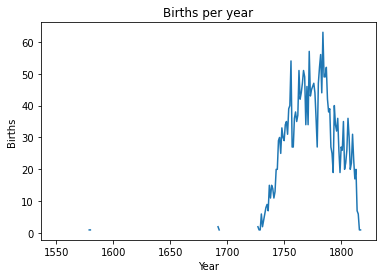

In [112]:
plt.plot(birth_date_graph_full_df['year'], birth_date_graph_full_df['count'])
plt.xlabel('Year')
plt.ylabel('Births')
plt.title('Births per year')
plt.show()

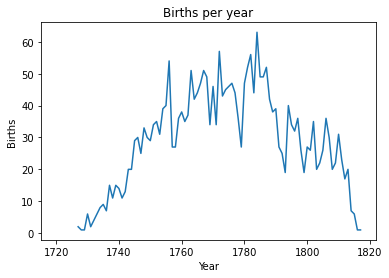

In [113]:
plt.plot(birth_date_graph_detail_df['year'], birth_date_graph_detail_df['count'])
plt.xlabel('Year')
plt.ylabel('Births')
plt.title('Births per year')
plt.show()

## Where were people born?

In [70]:
birth_locations_df = pd.DataFrame(people_df["birth_location"].value_counts()).reset_index().rename(columns = {
                                                                                        "birth_location": "count", 
                                                                                        "index": "location_id"
                                                                                        })
birth_location_df = pd.merge(birth_locations_df, locations_df,
                            how = "left",
                            on = "location_id")
birth_location_df = birth_location_df.loc[~birth_location_df["location"].isin(["d", "run", "retired", "drowned"])]
birth_location_df = birth_location_df.loc[birth_location_df["location"].notna()]
birth_location_df[:30]

,location_id,birth_count,location,category,lat,lon
1,l1684,264,England,people_birth,34.54426,-91.96903
2,l1677,105,Scotland,people_birth,39.96870,-77.58721
5,l945,26,Ireland,calls,NaN,NaN
7,l1686,23,Edinburgh,people_birth,55.95206,-3.19648
8,l745,13,London,calls,42.98339,-81.23304
9,l1702,10,Glasgow,people_birth,39.22725,-92.84658
10,l1949,8,Wales,people_birth,53.34061,-1.28162
11,l1873,7,Aberdeen,people_birth,42.94408,-112.83833
12,l890,7,Dublin,calls,40.09923,-83.11408
13,l1678,7,Surgeon,people_birth,NaN,NaN


1784     63
1772     57
1782     56
1756     54
1781     52
         ..
6278      1
1693      1
17 70     1
1895      1
747       1
Name: birth_date, Length: 152, dtype: int64